Import the JSON file using the JSON library

In [43]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Method 1 to read JSON data
json_file = open('loan_data_json.json')
data = json.load(json_file)

In [8]:
# Method 2 to read JSON data
with open('loan_data_json.json') as json_file:
    data = json.load(json_file)

In [9]:
# Convert the list file (data) into a dataframe
loandata = pd.DataFrame(data)

In [10]:
# Find unique values in a column
loandata['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [5]:
# describe the data
loandata.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [13]:
# Describe data in a single column
loandata['int.rate'].describe()
loandata['fico'].describe()
loandata['dti'].describe()

count    9578.000000
mean       12.606679
std         6.883970
min         0.000000
25%         7.212500
50%        12.665000
75%        17.950000
max        29.960000
Name: dti, dtype: float64

In [15]:
# Using EXP() to get the annual income
income = np.exp(loandata['log.annual.inc'])

In [17]:
# Insert income into the dataframe as a column (while rouding it)
loandata['annualincome'] = round(income)

In [38]:
# FICO Score
# fico < 400: 'Very Poor'
# fico >= 400 and < 600: 'Poor'
# fico >= 600 and < 660: 'Fair'
# fico >= 660 and < 780: 'Good'
# fico >= 780: 'Excellent'

ficocat = []
for n in range (0, len(loandata['fico'])):
    
    if loandata['fico'][n] < 400:
        ficocat.append('Very Poor')
    elif loandata['fico'][n] >= 400 and loandata['fico'][n] < 600:
        ficocat.append('Poor')
    elif loandata['fico'][n] >= 600 and loandata['fico'][n] < 660:
        ficocat.append('Fair')
    elif loandata['fico'][n] >= 660 and loandata['fico'][n] < 780:
        ficocat.append('Good')
    elif loandata['fico'][n] >= 780:
        ficocat.append('Excellent')
    else:
        ficocat.append('Unknown')
# convert list to series
ficocat = pd.Series(ficocat)
# add series to df as a column
loandata['ficocategory'] = ficocat

In [37]:
loandata = loandata.drop('ficocategory', axis=1)

In [41]:
# df.loc as conditional statement
# df.loc[df[columnname] condition, newcolumnname] = 'value if the condition is met'

# create a new column based on conditions of interest rate, where rate > 0.12 then high, else low

loandata.loc[loandata['int.rate'] > 0.12, 'int.rate.type'] = 'high'
loandata.loc[loandata['int.rate'] <= 0.12, 'int.rate.type'] = 'low'

<function matplotlib.pyplot.show(close=None, block=None)>

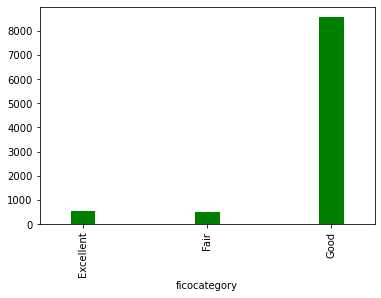

In [50]:
# number of loans(rows) by fico.category
catplot = loandata.groupby(['ficocategory']).size()
catplot.plot.bar(color='green', width=0.2)
plt.show()

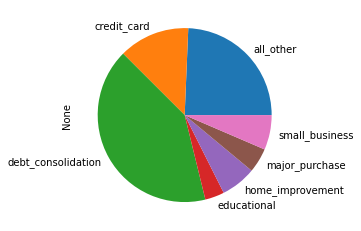

In [52]:
# number of loans(rows) by purpose
purplot = loandata.groupby(['purpose']).size()
purplot.plot.pie()
plt.show()

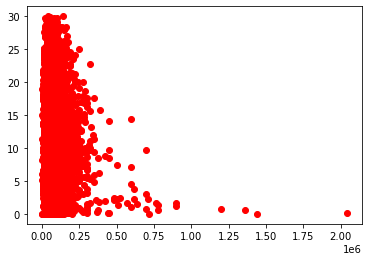

In [58]:
# scatter plot

xpoint = loandata['annualincome']
ypoint = loandata['dti']
plt.scatter(xpoint, ypoint, color='red')
plt.show()

In [59]:
# writing to csv
loandata.to_csv('loan_cleaned.csv', index=True)